## PLOTTING CONTOUR DATA ON A MAP
- much of our data is *spatial*, specifically with latitude and longitude coordinates
<br><br>
- it's helpful, and even necessary, to plot such data on a *map*
<br><br>
- we will use the **Cartopy** package for producing maps!
<br><br>
- **projection**:  different ways to plot data from a sphere onto a 2D surface
<br><br>
- useful features of Cartopy
  - many projections to choose from
  - easy to add coastlines and other geographical features
  - and other plotting elements like gridlines!
<br><br>
- **first, let's create map itself**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.colors as mcolors
import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features 
from cartopy.util import add_cyclic_point

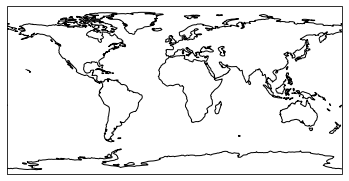

In [9]:
# Plotting the map itself
              # many other projection options!
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

In [10]:
ds = xr.open_dataset('air.mon.mean_levs.nc')
print(ds)
temp = ds['air'] # (time,level,lat,lon), with levels beginning at p = 1000 mb 
lon = ds['lon']
lat = ds['lat'] 

<xarray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 875)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-11-01
Data variables:
    air      (time, level, lat, lon) float32 ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Mon Jul  5 21:45:36 1999: ncrcat air.mon.mean.nc /Dataset...
    title:          monthly mean air from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...


- **now, map with temperature data!**

Text(0.5, 1.0, 'Monthly Mean Air Temperatures: November 2020')

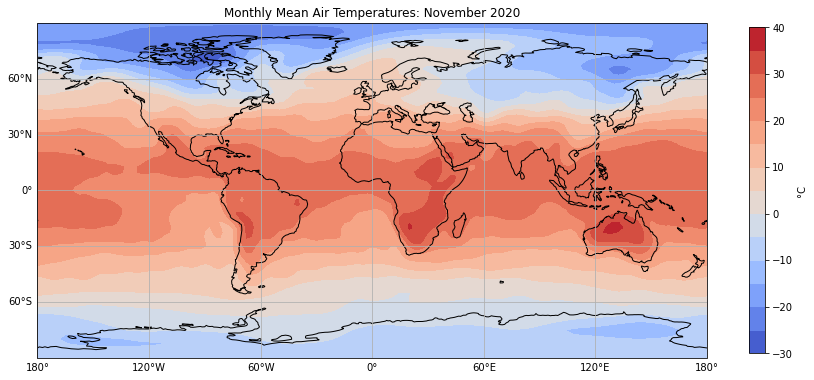

In [11]:
# Same colormap as previous lesson on 2D plotting
cmap=plt.get_cmap('coolwarm')

# Necessary to avoid a missing strip of data
temp, lon = add_cyclic_point(temp, coord=lon)

# Create your meshgrid using lon and lat
X, Y = np.meshgrid(lon, lat)

# A common projection to use 
proj=ccrs.PlateCarree()

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

cs = ax.contourf(X,Y,temp[-1,0,:,:],cmap=cmap,levels = 13,norm = mcolors.TwoSlopeNorm(0))
cb=fig.colorbar(cs,shrink=0.4)

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()

cb.set_label("\u00b0C")
ax.set_title('Monthly Mean Air Temperatures: November 2020')

## PLOTTING VECTOR DATA 
- **vector**:  a quantity with both a magnitude and a direction
<br><br>
- examples of vectors:
  - winds 
  - lava flow
  - plate motion
<br><br>
- in Matplotlib, use *quiver(x,y,u,v)*
  - many options, including changing arrow color and size!

#### Example: WRF model output of Hurricane Katrina
(1) first, plot just contoured field (reflectivity)

In [12]:
ds = xr.open_dataset('wrfout_d01_2005-08-29_00_00_00.nc')

<xarray.Dataset>
Dimensions:  (NX: 89, NY: 79)
Dimensions without coordinates: NX, NY
Data variables:
    Lat      (NX, NY) float32 ...
    Lon      (NX, NY) float32 ...
    Landuse  (NX, NY) float32 ...
    Pres     (NX, NY) float32 ...
    Usfc     (NX, NY) float32 ...
    Vsfc     (NX, NY) float32 ...
    Reflect  (NX, NY) float32 ...


Text(0.5, 1.0, 'Hurricane Katrina: August 29, 0000 UTC')

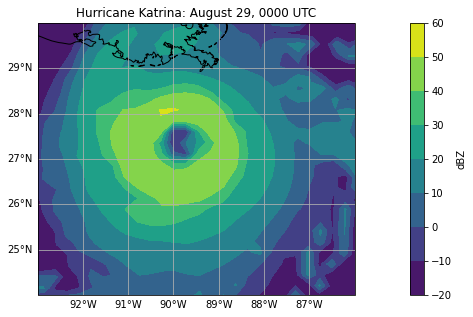

In [13]:
print(ds)
#print(ds)
#temp = ds['air']
lon = ds['Lon']
lat = ds['Lat']
u = ds['Usfc']
v = ds['Vsfc']
reflect = ds['Reflect']

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
proj=ccrs.PlateCarree()
                        # Can specify size of figure
fig, ax1 = plt.subplots(figsize=(20,5),subplot_kw=dict(projection=proj))

# Draw coastlines - this is from cartopy!
ax1.coastlines()

# Draw and modify gridlines 
gl = ax1.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot reflectivity
cs = ax1.contourf(lon,lat,reflect)

# Colorbar for reflectivity
cb=fig.colorbar(cs,shrink=1.0)
cb.set_label("dBZ")

# Let's zoom in to the Gulf of Mexico
ax1.set_extent([-93, -86, 24, 30])

# Set the plot title!
ax1.set_title("Hurricane Katrina: August 29, 0000 UTC")

#### Example: WRF model output of Hurricane Katrina
(2) now, overlay the surface wind vectors 

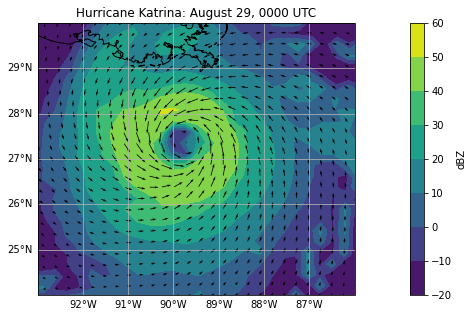

In [14]:
# Plot surface wind vectors
qs = ax1.quiver(lon,lat,u,v,color='k')
fig

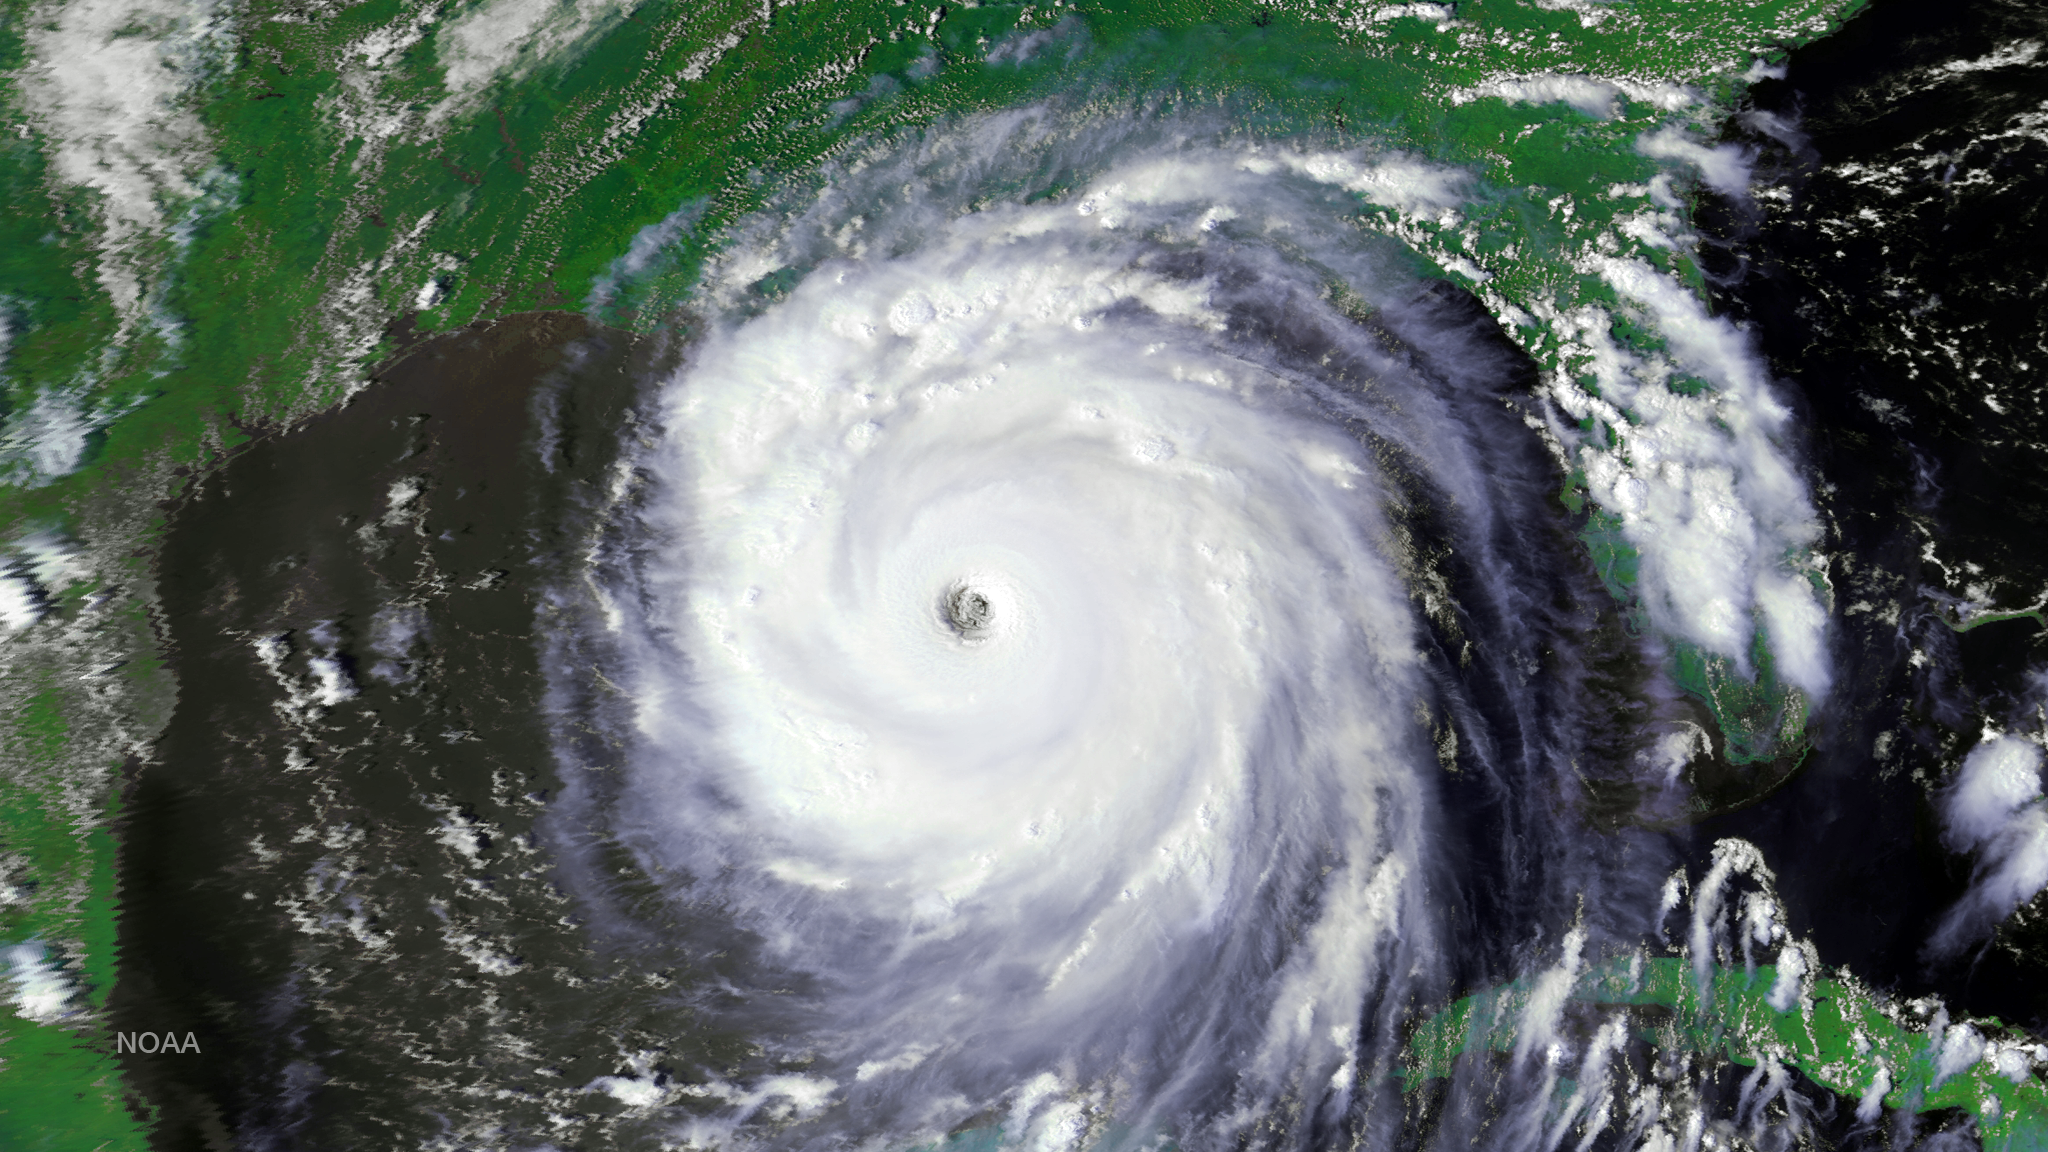

- Don't see a beautiful satellite image?  Click the link below!
- Satellite image courtesy of NOAA, at: https://www.noaa.gov/stories2014/images/1563v1_20050828-Katrina_NOAA-16.png